# Numerical Solution of 2D Laplace equation using Finite Difference Method (findiff)

- https://youtu.be/DWCNVF9oMkw

- PDE: $\displaystyle \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$
- Domain: $x \in [0, a], y \in [0, b]$
- Boundary conditions: $\displaystyle u(x, 0) = 0, u(x, b)=\frac{\sin(\omega x)}{\sin(\omega a)}, u(0, y) = 0, u(a, y) = \frac{\sinh(\omega y)}{\sinh(\omega b)}$

**Analytical Solution**
$$
u(x, y) = \frac{\sin(\omega x)}{\sin(\omega a)}\frac{\sinh(\omega y)}{\sinh(\omega b)}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = 3*np.pi
b = np.pi
nx = 100
ny = 50
x = np.linspace(0, a, nx)
y = np.linspace(0, b, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

(100, 50)


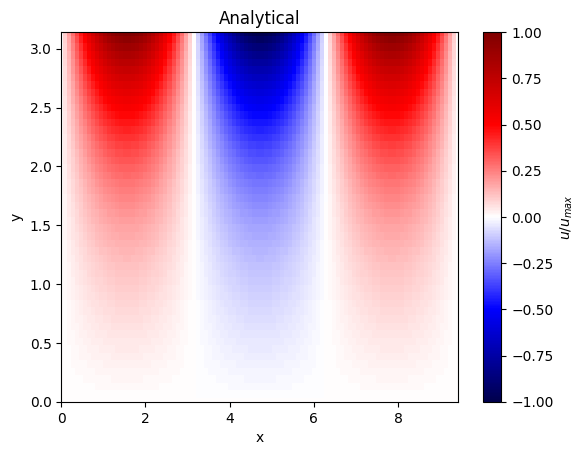

In [ ]:
# Analytical solution
u_true = (np.sin(X)/np.sin(a))*(np.sinh(Y)/np.sinh(b))
print(u_true.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
cf = ax.pcolormesh(X, Y, u_true/np.max(u_true), cmap='seismic')
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('$u/u_{max}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_title("Analytical")
plt.show()

## findiff

- https://github.com/maroba/findiff

findiff allows to easily define derivative operators that you can apply to numpy arrays of any dimension. The syntax for a simple derivative operator is

```
FinDiff(axis, spacing, degree)
```

where spacing is the separation of grid points between neighboring grid points.

(100, 50)


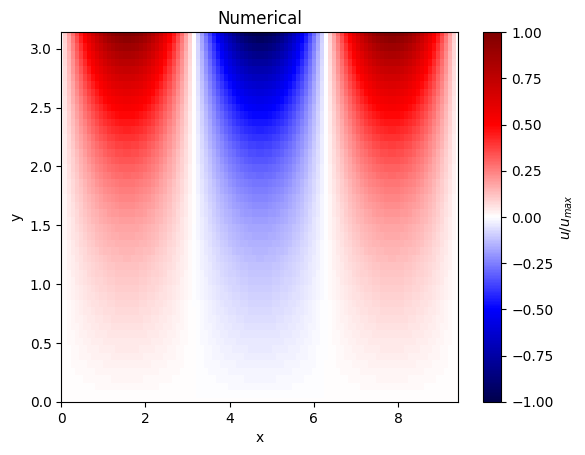

In [ ]:
from findiff import FinDiff, PDE, BoundaryConditions

dx = x[1] - x[0]
dy = y[1] - y[0]

# Laplacian operator = d^2/dx^2 + d^2/dy^2
L = FinDiff(0, dx, 2) + FinDiff(1, dy, 2)

# Source term
f = np.zeros((nx, ny))

# Boundary conditions
bc = BoundaryConditions((nx, ny))
# x = 0, Dirichlet BC
bc[0, :] = 0
# x = a, Dirichlet BC
bc[-1, :] = np.sinh(Y)/np.sinh(b)
# y = 0, Dirichlet BC
bc[:, 0] = 0
# y = b, Dirichlet BC
bc[:, -1] = np.sin(X)/np.sin(a)

# PDE
pde = PDE(L, f, bc)

# Numerical solution; solve the PDE
u_pred = pde.solve()
print(u_pred.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
cf = ax.pcolormesh(X, Y, u_pred/np.max(u_pred), cmap='seismic')
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('$u/u_{max}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_title("Numerical")
plt.show()

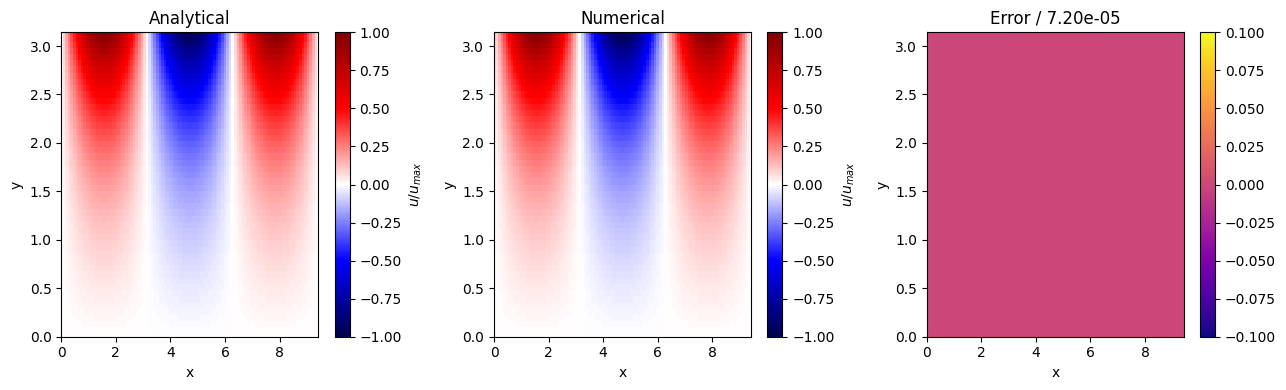

In [ ]:
nu_true = u_true/np.max(u_true)
nu_pred = u_pred/np.max(u_pred)
error_map = nu_true - nu_pred

fig = plt.figure(figsize=(13, 4))
ax = fig.add_subplot(131)
cf = ax.pcolormesh(X, Y, nu_true, cmap='seismic')
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('$u/u_{max}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_title("Analytical")

ax = fig.add_subplot(132)
cf = ax.pcolormesh(X, Y, nu_pred, cmap='seismic')
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('$u/u_{max}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_title("Numerical")

ax = fig.add_subplot(133)
cf = ax.pcolormesh(X, Y, error_map, cmap='plasma', vmin=-0.1, vmax=0.1)
cbar = fig.colorbar(cf, ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_title(f"Error / {np.abs(nu_true - nu_pred).mean():.2e}")

fig.tight_layout()
plt.show()